<a href="https://colab.research.google.com/github/edypj/DataPrediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Membaca data dari file CSV
data = pd.read_csv("/content/HargaEmas.csv")

df = pd.DataFrame(data)

# Ubah format tanggal menjadi tipe data datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

# Ubah format angka yang menggunakan koma menjadi format numerik
columns = ['Pembukaan', 'Tertinggi', 'Terendah', 'Terakhir']
for col in columns:
    df[col] = df[col].str.replace('.', '').str.replace(',', '.').astype(float)

# Menampilkan lima baris pertama dari DataFrame untuk memastikan data terbaca dengan benar
print(df.head())

# Siapkan fitur dan target
X = df[['Pembukaan', 'Tertinggi', 'Terendah']]  # Fitur
y = df['Terakhir']  # Target

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     Tanggal  Pembukaan  Tertinggi  Terendah  Terakhir
0 2024-03-22    2183.55    2187.95   2164.05    2176.6
1 2024-03-21    2190.20    2225.30   2168.20    2184.7
2 2024-03-20    2161.40    2192.20   2152.30    2161.0
3 2024-03-19    2164.00    2166.30   2150.20    2159.7
4 2024-03-18    2159.90    2167.20   2149.20    2164.3


<ipython-input-1-ffbdfe2a261d>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '').str.replace(',', '.').astype(float)


In [ ]:
# Latih model multivariate regression
model = LinearRegression()
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [ ]:
# Menampilkan koefisien regresi dan intersep
print("Regressor Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Menampilkan hasil prediksi
prediction_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(prediction_result)

# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Regressor Coefficients: [-0.55548848  0.74880529  0.80657843]
Intercept: 1.023001241086149
      Actual    Predicted
135   1946.2  1947.173219
478   1848.4  1850.620556
1193  1508.5  1506.604171
566   1829.7  1823.133761
626   1789.4  1791.912707
...      ...          ...
218   1963.1  1967.299163
887   1879.2  1879.891837
286   1850.5  1853.960709
1574  1305.2  1309.767921
1317  1316.1  1322.931805

[324 rows x 2 columns]
Mean Squared Error: 39.711604125917134


<ipython-input-4-2d8902e3694d>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red') # Garis diagonal untuk perbandingan


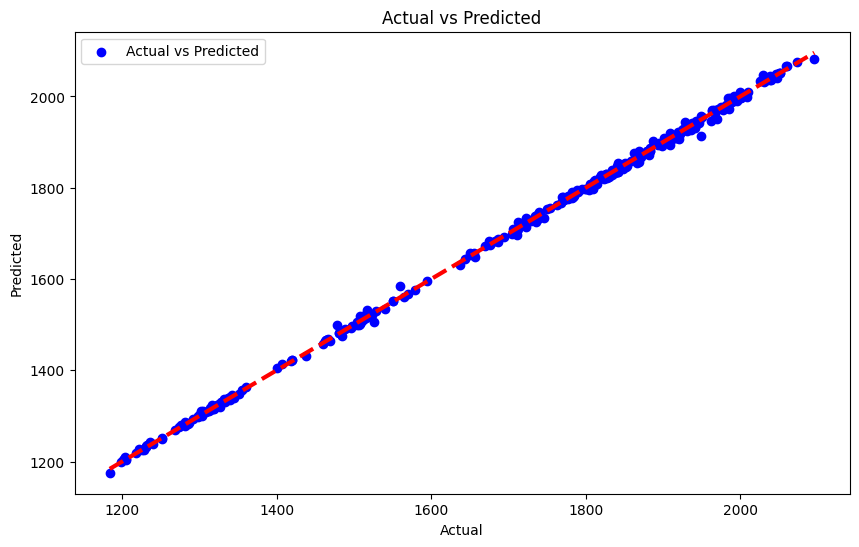

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red') # Garis diagonal untuk perbandingan
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Hitung R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9993827280107783


In [ ]:
# Data tunggal
single_data = {
    'Tanggal': '24/03/2024',
    'Pembukaan': 2100.55,
    'Tertinggi': 2187.95,
    'Terendah': 2164.05
}

# Ubah data tunggal ke dalam DataFrame
single_df = pd.DataFrame(single_data, index=[0])

# Lakukan praproses data jika diperlukan
single_df['Tanggal'] = pd.to_datetime(single_df['Tanggal'], format='%d/%m/%Y')

# Ubah format angka jika diperlukan
single_df['Pembukaan'] = single_df['Pembukaan'].astype(float)
single_df['Tertinggi'] = single_df['Tertinggi'].astype(float)
single_df['Terendah'] = single_df['Terendah'].astype(float)

# Siapkan fitur untuk prediksi
X_single = single_df[['Pembukaan', 'Tertinggi', 'Terendah']]

# Lakukan prediksi harga terakhir menggunakan model regressor yang sudah dilatih
predicted_last_price = model.predict(X_single)

# Tampilkan hasil prediksi
print("Predicted Last Price for", single_data['Tanggal'], ":", predicted_last_price[0])

Predicted Last Price for 24/03/2024 : 2218.0162527740854


In [ ]:
# Data untuk tanggal yang ingin diprediksi
new_dates = pd.to_datetime(['2024-03-23', '2024-03-24', '2024-03-25'])

# Siapkan data pembukaan, tertinggi, dan terendah untuk tanggal-tanggal tersebut
new_data = pd.DataFrame({
    'Tanggal': new_dates,
    'Pembukaan': [2195.0, 2299.0, 2180.0],
    'Tertinggi': [2220.0, 2235.0, 2200.0],
    'Terendah': [2180.0, 2200.0, 2160.0]
})

# Lakukan prediksi menggunakan model regressor yang sudah dilatih
predicted_prices = model.predict(new_data[['Pembukaan', 'Tertinggi', 'Terendah']])

# Tampilkan hasil prediksi
for i in range(len(new_dates)):
    print(f"Date: {new_dates[i].strftime('%Y-%m-%d')} -> Predicted Price: {predicted_prices[i]}")


Date: 2024-03-23 -> Predicted Price: 2202.414501193543
Date: 2024-03-24 -> Predicted Price: 2172.0073469933286
Date: 2024-03-25 -> Predicted Price: 2179.6391540558366
